In [ ]:
### To get the running time for every cell 
!pip install ipython-autotime
%load_ext autotime

  Created wheel for ipython-autotime: filename=ipython_autotime-0.1-cp36-none-any.whl size=1831 sha256=8bba91ab76fcc59fbac0d42e98ca53c33e3ad8484a3e2326acd5510737a5e66d
  Stored in directory: /root/.cache/pip/wheels/d2/df/81/2db1e54bc91002cec40334629bc39cfa86dff540b304ebcd6e
Successfully built ipython-autotime


In [ ]:
### Basic Imports
import numpy as np
import pandas as pd
import cv2
import os
import math
import IPython, PIL
from IPython.display import Image
import time
import matplotlib.pyplot as plt
%matplotlib inline

time: 569 ms


In [ ]:
### Making a Moon Like Dataset [X(x,y) -> y]
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=1000, noise=0.1, random_state=0)

time: 9.72 ms


In [ ]:
### Shape of X 
X.shape

(1000, 2)

time: 4.4 ms


In [ ]:
p = X[y == 0] # The X elements with y = 0 that is prediction for that X is 0
p.shape # Half of the items are with this prediction in the sample 

(500, 2)

time: 4.36 ms


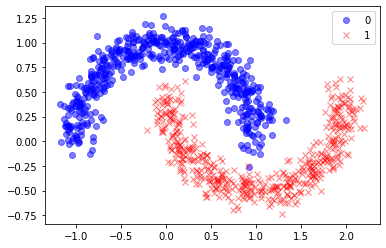

time: 259 ms


In [ ]:
### Plot the dataset coloring according to prediction 
plt.plot(X[y==0, 0], X[y==0, 1], 'ob', alpha=0.5) 
plt.plot(X[y==1, 0], X[y==1, 1], 'xr', alpha=0.5)
plt.legend(['0', '1'])

In [ ]:
### Split the data as training and testing dataset

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = \
train_test_split(X, y, test_size=0.3, random_state=42)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape) 

(700, 2)
(700,)
(300, 2)
(300,)
time: 5.66 ms


In [ ]:
### Import tensorflow to define and build the model and check its version
### Version 2.x is preferable 
import tensorflow as tf
print(tf.__version__)

'2.3.0'

time: 1.52 s


In [ ]:
### Define a model with just one layer (Not 'deep' at all though!)
### Just a dense layer with sigmoid activation function with one unit

model = tf.keras.models.Sequential([
      tf.keras.layers.Dense(1, activation="sigmoid", input_dim=2)
])
model.compile(tf.keras.optimizers.Adam(lr=0.05), "binary_crossentropy", metrics=["accuracy"])

time: 250 ms


In [ ]:
### Fitting the training data to the defined model 
model.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100
22/22 [==============================] - 0s 1ms/step - loss: 0.7340 - accuracy: 0.4143
Epoch 2/100
22/22 [==============================] - 0s 2ms/step - loss: 0.4381 - accuracy: 0.7971
Epoch 3/100
22/22 [==============================] - 0s 1ms/step - loss: 0.3483 - accuracy: 0.8329
Epoch 4/100
22/22 [==============================] - 0s 1ms/step - loss: 0.3116 - accuracy: 0.8500
Epoch 5/100
22/22 [==============================] - 0s 1ms/step - loss: 0.2886 - accuracy: 0.8614
Epoch 6/100
22/22 [==============================] - 0s 1ms/step - loss: 0.2732 - accuracy: 0.8729
Epoch 7/100
22/22 [==============================] - 0s 1ms/step - loss: 0.2619 - accuracy: 0.8757
Epoch 8/100
22/22 [==============================] - 0s 960us/step - loss: 0.2551 - accuracy: 0.8786
Epoch 9/100
22/22 [==============================] - 0s 1ms/step - loss: 0.2472 - accuracy: 0.8800
Epoch 10/100
22/22 [==============================] - 0s 1ms/step - loss: 0.2413 - accuracy: 0.8829
Epoch 1

time: 3.74 s


In [ ]:
### Evaluate with Test Dataset
test_loss, test_acc = model.evaluate(X_test, y_test)
print(test_loss, test_acc)

10/10 [==============================] - 0s 1ms/step - loss: 0.3159 - accuracy: 0.8367
0.3158975839614868 0.8366666436195374
time: 188 ms


/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


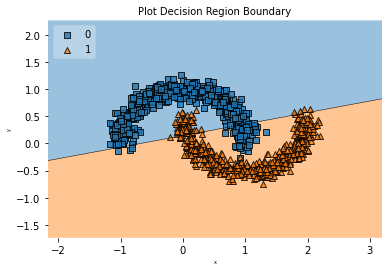

time: 2.19 s


In [ ]:
### Plot the Decision Boundary
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X=X, y=y, clf=model, legend=2)
plt.xlabel("x", size=5)
plt.ylabel("y", size=5)
plt.title("Plot Decision Region Boundary", size=10)
plt.show() 

In [ ]:
### Define a New Model and Compile (Some Deeper!)
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(4, input_shape=(2,), activation="tanh"))
model.add(tf.keras.layers.Dense(2, activation="tanh"))
model.add(tf.keras.layers.Dense(1, activation="sigmoid"))

model.compile(tf.keras.optimizers.Adam(lr=0.05), "binary_crossentropy", metrics=["accuracy"])

time: 51.7 ms


In [ ]:
### Traiing the new model with training data
model.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100
22/22 [==============================] - 0s 1ms/step - loss: 0.5438 - accuracy: 0.7714
Epoch 2/100
22/22 [==============================] - 0s 954us/step - loss: 0.2949 - accuracy: 0.8900
Epoch 3/100
22/22 [==============================] - 0s 1ms/step - loss: 0.2603 - accuracy: 0.8871
Epoch 4/100
22/22 [==============================] - 0s 1ms/step - loss: 0.2329 - accuracy: 0.8943
Epoch 5/100
22/22 [==============================] - 0s 1ms/step - loss: 0.2155 - accuracy: 0.8886
Epoch 6/100
22/22 [==============================] - 0s 1ms/step - loss: 0.2020 - accuracy: 0.8986
Epoch 7/100
22/22 [==============================] - 0s 1ms/step - loss: 0.2029 - accuracy: 0.9000
Epoch 8/100
22/22 [==============================] - 0s 963us/step - loss: 0.2024 - accuracy: 0.9071
Epoch 9/100
22/22 [==============================] - 0s 1ms/step - loss: 0.1762 - accuracy: 0.9157
Epoch 10/100
22/22 [==============================] - 0s 1ms/step - loss: 0.1747 - accuracy: 0.9129
Epoch

time: 3.38 s


In [ ]:
### Find the accuracy with the test data
X_train_pred = model.predict_classes(X_train)
X_test_pred = model.predict_classes(X_test)

from sklearn.metrics import accuracy_score

accuracyScoreTrain = accuracy_score(y_train, X_train_pred)
accuracyScoreTest = accuracy_score(y_test, X_test_pred)

print("Accuracy Score in Train Data:", accuracyScoreTrain)
print("Accuracy Score in Test Data:", accuracyScoreTest)


Accuracy Score in Train Data: 0.9985714285714286
Accuracy Score in Test Data: 0.9966666666666667
time: 116 ms


/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


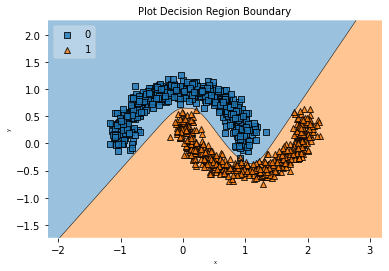

time: 3.06 s


In [ ]:
### Plot new decision boundary. (Pretty better than before, na? :D )
plot_decision_regions(X=X, y=y, clf=model, legend=2)
plt.xlabel("x", size=5)
plt.ylabel("y", size=5)
plt.title('Plot Decision Region Boundary', size=10)
plt.show()

In [ ]:
### Reference Link (Written in Bengali)
ReferenceLink = "https://is.gd/BdxWbR"